In [1]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg19 import VGG19
import sys, glob, math, os
import cv2
import numpy as np
import re


Using TensorFlow backend.


In [2]:
# image sizes
img_rows, img_cols = 224, 224

In [3]:
def vgg19_lower_model():
    # initial model, load vgg19
    vgg19 = VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)
    vgg19.summary()

    # new model that takes first 10 layers of VGG19
    model = Sequential()
    model.add(vgg19.get_layer('input_1'))
    model.add(vgg19.get_layer('block1_conv1'))
    model.add(vgg19.get_layer('block1_conv2'))
    model.add(vgg19.get_layer('block1_pool'))
    model.add(vgg19.get_layer('block2_conv1'))
    model.add(vgg19.get_layer('block2_conv2'))
    model.add(vgg19.get_layer('block2_pool'))
    model.add(vgg19.get_layer('block3_conv1'))
    model.add(vgg19.get_layer('block3_conv2'))
    model.add(vgg19.get_layer('block3_conv3'))
    model.add(vgg19.get_layer('block3_conv4'))
    model.add(vgg19.get_layer('block3_pool'))
    model.add(vgg19.get_layer('block4_conv1'))
    model.add(vgg19.get_layer('block4_conv2'))
    model.add(vgg19.get_layer('block4_conv3'))
    model.add(vgg19.get_layer('block4_conv4'))
    model.add(vgg19.get_layer('block4_pool'))
    model.add(vgg19.get_layer('block5_conv1'))
    model.add(vgg19.get_layer('block5_conv2'))
    model.add(vgg19.get_layer('block5_conv3'))
    model.add(vgg19.get_layer('block5_conv4'))
    model.add(vgg19.get_layer('block5_pool'))
    model.add(Flatten())
    model.summary()
 
    return model
#END vgg19_lower_model()

In [4]:
def load_imgs(dir,normalize=0):
    # load image data from dir

    data = []
    fname = []
    path  = dir + '/scene*.JPG'
    files = sorted(glob.glob(path))

    for fl in files:
        flbase = os.path.basename(fl)
        print('reading %s'%format(fl))

        img = cv2.imread(fl)
        img = cv2.resize(img, (img_rows,img_cols))
        img = np.array(img, dtype=np.float32)
        if normalize == 1:
            img -= np.mean(img)
            img /= np.std(img)

        data.append(img)
        fname.append(fl)

    data = np.array(data,dtype=np.float32)

    return data, fname
# end of load_imgs

In [14]:
def get_id_from_fname(str):
    
    m = re.match(r"([a-z/\\]+)([0-9]+)([a-z]+).[a-zA-Z]",str)

    if m:
    #    print("found!")
        id = int(m.group(2))
    #    print(id)
    else:
    #    print("not found!")
        id = -1
    
    return id
#end of get_id_from_frame

In [6]:
def angular_distance(vec1,vec2):
    v1 = vec1 / np.linalg.norm(vec1)
    v2 = vec2 / np.linalg.norm(vec2)
    
    return np.dot(v1,v2)
#end of angular_distance

In [7]:
#if __name__=='__main__':
#    argv = sys.argv
#
#    if len(argv) < 2:
#        print('usage: %s [dir]' % argv[0])
#        exit(0)

data,fname = load_imgs('scenes',1) 

reading scenes\scene007a.JPG
reading scenes\scene007b.JPG
reading scenes\scene007c.JPG
reading scenes\scene007d.JPG
reading scenes\scene007e.JPG
reading scenes\scene007f.JPG
reading scenes\scene007g.JPG
reading scenes\scene008a.JPG
reading scenes\scene008b.JPG
reading scenes\scene009a.JPG
reading scenes\scene009b.JPG
reading scenes\scene009c.JPG
reading scenes\scene009d.JPG
reading scenes\scene009e.JPG
reading scenes\scene009f.JPG
reading scenes\scene010a.JPG
reading scenes\scene010b.JPG
reading scenes\scene010c.JPG
reading scenes\scene010d.JPG
reading scenes\scene011a.JPG
reading scenes\scene011b.JPG
reading scenes\scene011c.JPG
reading scenes\scene012a.JPG
reading scenes\scene012b.JPG
reading scenes\scene012c.JPG
reading scenes\scene012d.JPG
reading scenes\scene013a.JPG
reading scenes\scene013b.JPG
reading scenes\scene013c.JPG
reading scenes\scene013d.JPG
reading scenes\scene014a.JPG
reading scenes\scene014b.JPG
reading scenes\scene014c.JPG
reading scenes\scene014d.JPG
reading scenes

In [8]:
print(data.shape)
#print(np.size(data2))
model = vgg19_lower_model()
out = model.predict(data, batch_size=32, verbose=1)
#cv2.waitKey(0)

print(out.shape)

(184, 224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0 

In [15]:
np.savetxt("result.csv", out, delimiter=",")
f = open('result-fname.txt', 'w')
id = []

for i in range(0,len(fname)):
    f.write(fname[i]+'\n')
    r = get_id_from_fname(fname[i])
    if r:
        id.append(r)
    else:
        print("cannot retrieve id from" + format(fname[i]))
    
f.close() 

In [16]:
print(out.shape)
print(id)

(184, 25088)
[7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44]


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(out)
X_pca = pca.transform(out)
X_pca.shape

(184, 100)

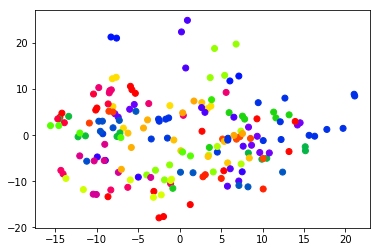

In [18]:
import matplotlib.pyplot as plt

id = np.array(id)
plt.scatter(X_pca[:,1],X_pca[:,2], c=id, cmap='prism')
#plt.scatter(X_pca[:,1],X_pca[:,2])

plt.show()

In [23]:
ndata = id.shape[0]
d = np.zeros([ndata,ndata])

for i in range(0,ndata):
    for j in range(0,ndata):
        d[i,j] = angular_distance(X_pca[i,1:50],X_pca[j,1:50])
        print("%d(%d) - %d(%d) : %f" % (i, id[i], j, id[j], d[i,j]))

0(7) - 0(7) : 1.000000
0(7) - 1(7) : 0.990772
0(7) - 2(7) : 0.384473
0(7) - 3(7) : 0.344281
0(7) - 4(7) : 0.483875
0(7) - 5(7) : 0.185137
0(7) - 6(7) : 0.185887
0(7) - 7(8) : 0.155302
0(7) - 8(8) : 0.228649
0(7) - 9(9) : -0.154398
0(7) - 10(9) : -0.144610
0(7) - 11(9) : 0.041743
0(7) - 12(9) : 0.034671
0(7) - 13(9) : 0.351434
0(7) - 14(9) : 0.290672
0(7) - 15(10) : 0.019647
0(7) - 16(10) : 0.033728
0(7) - 17(10) : 0.080640
0(7) - 18(10) : 0.079720
0(7) - 19(11) : 0.047072
0(7) - 20(11) : 0.053308
0(7) - 21(11) : 0.047771
0(7) - 22(12) : -0.005989
0(7) - 23(12) : 0.005735
0(7) - 24(12) : 0.082360
0(7) - 25(12) : 0.071117
0(7) - 26(13) : -0.046168
0(7) - 27(13) : -0.061069
0(7) - 28(13) : 0.047215
0(7) - 29(13) : 0.052977
0(7) - 30(14) : 0.332313
0(7) - 31(14) : 0.356825
0(7) - 32(14) : 0.112703
0(7) - 33(14) : 0.116428
0(7) - 34(15) : 0.074372
0(7) - 35(15) : 0.066446
0(7) - 36(15) : -0.070157
0(7) - 37(15) : -0.068710
0(7) - 38(15) : -0.074586
0(7) - 39(16) : -0.069922
0(7) - 40(16) : 

9(9) - 160(39) : -0.077982
9(9) - 161(39) : -0.004246
9(9) - 162(40) : 0.300596
9(9) - 163(40) : 0.060292
9(9) - 164(40) : 0.172142
9(9) - 165(41) : 0.062174
9(9) - 166(41) : 0.019061
9(9) - 167(41) : 0.047763
9(9) - 168(41) : -0.089967
9(9) - 169(41) : -0.049313
9(9) - 170(42) : 0.107938
9(9) - 171(42) : 0.096414
9(9) - 172(42) : 0.105240
9(9) - 173(42) : 0.114437
9(9) - 174(43) : 0.156402
9(9) - 175(43) : -0.022073
9(9) - 176(43) : -0.072128
9(9) - 177(43) : -0.074541
9(9) - 178(44) : 0.080243
9(9) - 179(44) : 0.063280
9(9) - 180(44) : 0.013232
9(9) - 181(44) : 0.014449
9(9) - 182(44) : -0.124424
9(9) - 183(44) : -0.127864
10(9) - 0(7) : -0.144610
10(9) - 1(7) : -0.136108
10(9) - 2(7) : 0.165635
10(9) - 3(7) : 0.228703
10(9) - 4(7) : 0.098391
10(9) - 5(7) : -0.047143
10(9) - 6(7) : -0.033715
10(9) - 7(8) : -0.183604
10(9) - 8(8) : -0.077095
10(9) - 9(9) : 0.995214
10(9) - 10(9) : 1.000000
10(9) - 11(9) : 0.225276
10(9) - 12(9) : 0.246314
10(9) - 13(9) : 0.458997
10(9) - 14(9) : 0.495

25(12) - 40(16) : -0.031914
25(12) - 41(16) : -0.118856
25(12) - 42(16) : -0.101872
25(12) - 43(16) : -0.094100
25(12) - 44(17) : -0.013765
25(12) - 45(17) : -0.009806
25(12) - 46(17) : 0.047003
25(12) - 47(17) : -0.105195
25(12) - 48(17) : 0.087248
25(12) - 49(17) : 0.039663
25(12) - 50(17) : 0.037683
25(12) - 51(18) : 0.052423
25(12) - 52(18) : 0.027427
25(12) - 53(18) : 0.027128
25(12) - 54(18) : -0.025938
25(12) - 55(18) : -0.025059
25(12) - 56(19) : -0.121590
25(12) - 57(19) : -0.098068
25(12) - 58(19) : -0.036914
25(12) - 59(19) : -0.017417
25(12) - 60(19) : -0.007231
25(12) - 61(20) : -0.088989
25(12) - 62(20) : -0.094298
25(12) - 63(20) : -0.008577
25(12) - 64(20) : 0.017068
25(12) - 65(21) : 0.064760
25(12) - 66(21) : 0.060568
25(12) - 67(21) : 0.070484
25(12) - 68(21) : -0.017693
25(12) - 69(21) : -0.006980
25(12) - 70(21) : -0.003908
25(12) - 71(21) : 0.124738
25(12) - 72(22) : -0.020934
25(12) - 73(22) : -0.022591
25(12) - 74(22) : -0.054653
25(12) - 75(22) : -0.009387
25(1

41(16) - 74(22) : -0.110447
41(16) - 75(22) : -0.179391
41(16) - 76(22) : -0.203015
41(16) - 77(23) : 0.161963
41(16) - 78(23) : 0.007038
41(16) - 79(23) : 0.026697
41(16) - 80(23) : 0.234461
41(16) - 81(23) : 0.134540
41(16) - 82(23) : 0.273472
41(16) - 83(23) : 0.106692
41(16) - 84(24) : -0.141655
41(16) - 85(24) : -0.144384
41(16) - 86(24) : 0.013203
41(16) - 87(24) : -0.101893
41(16) - 88(24) : 0.027970
41(16) - 89(24) : 0.022673
41(16) - 90(25) : -0.058177
41(16) - 91(25) : -0.085130
41(16) - 92(25) : 0.022092
41(16) - 93(25) : 0.176786
41(16) - 94(26) : 0.240552
41(16) - 95(26) : 0.164498
41(16) - 96(26) : 0.121202
41(16) - 97(26) : 0.440501
41(16) - 98(27) : -0.033672
41(16) - 99(27) : -0.015787
41(16) - 100(27) : -0.201411
41(16) - 101(27) : -0.187828
41(16) - 102(27) : -0.216641
41(16) - 103(27) : -0.181813
41(16) - 104(27) : -0.007571
41(16) - 105(27) : -0.018613
41(16) - 106(27) : 0.109380
41(16) - 107(27) : 0.092536
41(16) - 108(27) : 0.136691
41(16) - 109(27) : 0.125700
41

55(18) - 88(24) : 0.010617
55(18) - 89(24) : -0.001027
55(18) - 90(25) : -0.210994
55(18) - 91(25) : -0.207297
55(18) - 92(25) : -0.114421
55(18) - 93(25) : 0.193319
55(18) - 94(26) : -0.186890
55(18) - 95(26) : -0.059614
55(18) - 96(26) : -0.095709
55(18) - 97(26) : 0.117256
55(18) - 98(27) : 0.080272
55(18) - 99(27) : 0.089588
55(18) - 100(27) : -0.244225
55(18) - 101(27) : -0.218824
55(18) - 102(27) : -0.169746
55(18) - 103(27) : -0.187561
55(18) - 104(27) : 0.039743
55(18) - 105(27) : 0.091562
55(18) - 106(27) : 0.068048
55(18) - 107(27) : 0.043267
55(18) - 108(27) : 0.050870
55(18) - 109(27) : 0.026435
55(18) - 110(27) : -0.236245
55(18) - 111(27) : 0.001361
55(18) - 112(27) : 0.110401
55(18) - 113(27) : 0.113316
55(18) - 114(27) : 0.073531
55(18) - 115(28) : -0.224164
55(18) - 116(28) : -0.208530
55(18) - 117(28) : 0.075203
55(18) - 118(28) : -0.156767
55(18) - 119(28) : -0.164021
55(18) - 120(29) : 0.102592
55(18) - 121(29) : 0.111842
55(18) - 122(29) : 0.057151
55(18) - 123(30)

71(21) - 57(19) : -0.005341
71(21) - 58(19) : -0.080168
71(21) - 59(19) : -0.180280
71(21) - 60(19) : -0.153591
71(21) - 61(20) : 0.188334
71(21) - 62(20) : 0.194077
71(21) - 63(20) : -0.172257
71(21) - 64(20) : -0.196924
71(21) - 65(21) : 0.004292
71(21) - 66(21) : 0.106095
71(21) - 67(21) : 0.405793
71(21) - 68(21) : 0.220999
71(21) - 69(21) : 0.220502
71(21) - 70(21) : 0.319799
71(21) - 71(21) : 1.000000
71(21) - 72(22) : 0.141982
71(21) - 73(22) : -0.138964
71(21) - 74(22) : 0.323957
71(21) - 75(22) : -0.007636
71(21) - 76(22) : 0.181870
71(21) - 77(23) : 0.186423
71(21) - 78(23) : 0.117044
71(21) - 79(23) : 0.111498
71(21) - 80(23) : -0.066544
71(21) - 81(23) : 0.044294
71(21) - 82(23) : -0.091035
71(21) - 83(23) : -0.026953
71(21) - 84(24) : 0.150505
71(21) - 85(24) : 0.163864
71(21) - 86(24) : 0.359240
71(21) - 87(24) : 0.301563
71(21) - 88(24) : 0.250188
71(21) - 89(24) : 0.243281
71(21) - 90(25) : -0.189236
71(21) - 91(25) : -0.181179
71(21) - 92(25) : -0.252661
71(21) - 93(25

87(24) - 81(23) : 0.360255
87(24) - 82(23) : 0.249866
87(24) - 83(23) : 0.435845
87(24) - 84(24) : -0.025793
87(24) - 85(24) : -0.002374
87(24) - 86(24) : 0.040265
87(24) - 87(24) : 1.000000
87(24) - 88(24) : 0.585993
87(24) - 89(24) : 0.579777
87(24) - 90(25) : -0.014782
87(24) - 91(25) : -0.016638
87(24) - 92(25) : -0.035488
87(24) - 93(25) : -0.043501
87(24) - 94(26) : -0.009213
87(24) - 95(26) : 0.019024
87(24) - 96(26) : 0.017879
87(24) - 97(26) : -0.085179
87(24) - 98(27) : 0.027695
87(24) - 99(27) : 0.039907
87(24) - 100(27) : 0.020927
87(24) - 101(27) : 0.017512
87(24) - 102(27) : 0.021099
87(24) - 103(27) : 0.015189
87(24) - 104(27) : 0.019268
87(24) - 105(27) : -0.077547
87(24) - 106(27) : -0.090960
87(24) - 107(27) : -0.094391
87(24) - 108(27) : -0.044061
87(24) - 109(27) : -0.030610
87(24) - 110(27) : 0.038314
87(24) - 111(27) : 0.059777
87(24) - 112(27) : -0.078069
87(24) - 113(27) : -0.075862
87(24) - 114(27) : -0.155227
87(24) - 115(28) : 0.017322
87(24) - 116(28) : 0.02

101(27) - 31(14) : 0.019525
101(27) - 32(14) : -0.074196
101(27) - 33(14) : -0.123833
101(27) - 34(15) : 0.008533
101(27) - 35(15) : 0.011107
101(27) - 36(15) : 0.028266
101(27) - 37(15) : 0.039260
101(27) - 38(15) : 0.060187
101(27) - 39(16) : -0.134304
101(27) - 40(16) : -0.149131
101(27) - 41(16) : -0.187828
101(27) - 42(16) : -0.175658
101(27) - 43(16) : -0.209285
101(27) - 44(17) : -0.204760
101(27) - 45(17) : -0.195839
101(27) - 46(17) : -0.253733
101(27) - 47(17) : -0.309197
101(27) - 48(17) : -0.149638
101(27) - 49(17) : -0.087242
101(27) - 50(17) : -0.082252
101(27) - 51(18) : -0.022938
101(27) - 52(18) : -0.008252
101(27) - 53(18) : -0.106028
101(27) - 54(18) : -0.214247
101(27) - 55(18) : -0.218824
101(27) - 56(19) : 0.032912
101(27) - 57(19) : 0.059268
101(27) - 58(19) : 0.000853
101(27) - 59(19) : 0.046277
101(27) - 60(19) : 0.045068
101(27) - 61(20) : 0.022418
101(27) - 62(20) : -0.052465
101(27) - 63(20) : -0.030453
101(27) - 64(20) : 0.097813
101(27) - 65(21) : 0.044427

115(28) - 172(42) : -0.055069
115(28) - 173(42) : -0.069525
115(28) - 174(43) : 0.282076
115(28) - 175(43) : 0.183098
115(28) - 176(43) : -0.138453
115(28) - 177(43) : -0.247707
115(28) - 178(44) : 0.279383
115(28) - 179(44) : -0.007339
115(28) - 180(44) : -0.076595
115(28) - 181(44) : -0.069661
115(28) - 182(44) : 0.310372
115(28) - 183(44) : 0.317877
116(28) - 0(7) : 0.224135
116(28) - 1(7) : 0.206348
116(28) - 2(7) : 0.174502
116(28) - 3(7) : 0.172826
116(28) - 4(7) : -0.136928
116(28) - 5(7) : -0.092207
116(28) - 6(7) : -0.109018
116(28) - 7(8) : -0.156772
116(28) - 8(8) : -0.022745
116(28) - 9(9) : 0.137626
116(28) - 10(9) : 0.131797
116(28) - 11(9) : -0.046153
116(28) - 12(9) : -0.029788
116(28) - 13(9) : 0.255433
116(28) - 14(9) : 0.211582
116(28) - 15(10) : -0.007043
116(28) - 16(10) : -0.014302
116(28) - 17(10) : 0.104322
116(28) - 18(10) : 0.046022
116(28) - 19(11) : -0.101868
116(28) - 20(11) : 0.022338
116(28) - 21(11) : 0.031622
116(28) - 22(12) : -0.202996
116(28) - 23(12

131(32) - 10(9) : -0.134313
131(32) - 11(9) : -0.110682
131(32) - 12(9) : -0.115128
131(32) - 13(9) : -0.080367
131(32) - 14(9) : -0.061394
131(32) - 15(10) : -0.241501
131(32) - 16(10) : -0.266546
131(32) - 17(10) : -0.182161
131(32) - 18(10) : -0.206936
131(32) - 19(11) : -0.011765
131(32) - 20(11) : -0.088553
131(32) - 21(11) : -0.108540
131(32) - 22(12) : -0.040921
131(32) - 23(12) : -0.017145
131(32) - 24(12) : 0.055838
131(32) - 25(12) : 0.063915
131(32) - 26(13) : -0.180922
131(32) - 27(13) : -0.196709
131(32) - 28(13) : -0.168404
131(32) - 29(13) : -0.154298
131(32) - 30(14) : -0.031731
131(32) - 31(14) : -0.002730
131(32) - 32(14) : -0.051018
131(32) - 33(14) : -0.071780
131(32) - 34(15) : 0.004982
131(32) - 35(15) : 0.002480
131(32) - 36(15) : -0.014385
131(32) - 37(15) : -0.025592
131(32) - 38(15) : 0.095170
131(32) - 39(16) : 0.114203
131(32) - 40(16) : 0.111817
131(32) - 41(16) : -0.019472
131(32) - 42(16) : 0.001589
131(32) - 43(16) : 0.035063
131(32) - 44(17) : 0.047868


145(35) - 117(28) : 0.348385
145(35) - 118(28) : 0.191712
145(35) - 119(28) : 0.119556
145(35) - 120(29) : 0.002840
145(35) - 121(29) : 0.200976
145(35) - 122(29) : 0.224730
145(35) - 123(30) : 0.353051
145(35) - 124(31) : 0.081524
145(35) - 125(31) : 0.046088
145(35) - 126(31) : 0.018931
145(35) - 127(31) : 0.082761
145(35) - 128(32) : 0.218525
145(35) - 129(32) : 0.029859
145(35) - 130(32) : 0.019745
145(35) - 131(32) : 0.040466
145(35) - 132(32) : 0.005773
145(35) - 133(32) : 0.234892
145(35) - 134(33) : 0.416880
145(35) - 135(33) : 0.257395
145(35) - 136(33) : 0.265776
145(35) - 137(33) : 0.225492
145(35) - 138(34) : 0.215468
145(35) - 139(34) : 0.157874
145(35) - 140(34) : -0.040648
145(35) - 141(34) : -0.052831
145(35) - 142(34) : -0.180925
145(35) - 143(34) : -0.080524
145(35) - 144(34) : -0.068797
145(35) - 145(35) : 1.000000
145(35) - 146(35) : 0.691947
145(35) - 147(35) : 0.483370
145(35) - 148(35) : 0.505216
145(35) - 149(36) : -0.007709
145(35) - 150(36) : 0.059228
145(35) 

160(39) - 171(42) : -0.041016
160(39) - 172(42) : -0.044866
160(39) - 173(42) : -0.075032
160(39) - 174(43) : 0.035926
160(39) - 175(43) : 0.070065
160(39) - 176(43) : -0.025824
160(39) - 177(43) : -0.035319
160(39) - 178(44) : -0.021555
160(39) - 179(44) : 0.048341
160(39) - 180(44) : -0.001313
160(39) - 181(44) : -0.004053
160(39) - 182(44) : -0.112942
160(39) - 183(44) : -0.121972
161(39) - 0(7) : -0.031644
161(39) - 1(7) : -0.027557
161(39) - 2(7) : -0.106078
161(39) - 3(7) : -0.111765
161(39) - 4(7) : 0.088940
161(39) - 5(7) : -0.017311
161(39) - 6(7) : -0.013690
161(39) - 7(8) : -0.012502
161(39) - 8(8) : -0.036257
161(39) - 9(9) : -0.004246
161(39) - 10(9) : -0.016705
161(39) - 11(9) : -0.123453
161(39) - 12(9) : -0.116330
161(39) - 13(9) : -0.026775
161(39) - 14(9) : -0.011385
161(39) - 15(10) : -0.025837
161(39) - 16(10) : -0.019986
161(39) - 17(10) : -0.074201
161(39) - 18(10) : -0.074955
161(39) - 19(11) : -0.160605
161(39) - 20(11) : -0.029719
161(39) - 21(11) : -0.029642
1

174(43) - 95(26) : 0.034707
174(43) - 96(26) : 0.006050
174(43) - 97(26) : -0.034698
174(43) - 98(27) : 0.057783
174(43) - 99(27) : 0.046765
174(43) - 100(27) : 0.123528
174(43) - 101(27) : 0.090446
174(43) - 102(27) : 0.066224
174(43) - 103(27) : 0.060242
174(43) - 104(27) : 0.021085
174(43) - 105(27) : -0.403467
174(43) - 106(27) : -0.137520
174(43) - 107(27) : -0.151837
174(43) - 108(27) : -0.191526
174(43) - 109(27) : -0.199508
174(43) - 110(27) : -0.171036
174(43) - 111(27) : 0.034158
174(43) - 112(27) : -0.183336
174(43) - 113(27) : -0.189333
174(43) - 114(27) : -0.167394
174(43) - 115(28) : 0.282076
174(43) - 116(28) : 0.270073
174(43) - 117(28) : -0.076600
174(43) - 118(28) : 0.048365
174(43) - 119(28) : 0.020851
174(43) - 120(29) : 0.029528
174(43) - 121(29) : 0.102009
174(43) - 122(29) : 0.135313
174(43) - 123(30) : 0.284907
174(43) - 124(31) : -0.089146
174(43) - 125(31) : -0.007146
174(43) - 126(31) : -0.022232
174(43) - 127(31) : -0.129515
174(43) - 128(32) : 0.142608
174(

In [24]:
print(d.shape)

(184, 184)


In [25]:
NUM_CANDIDATE = 2
n_found = 0

for i in range(0,ndata):
    myid = id[i]
    n_match = 0
    
    for j in range(0,NUM_CANDIDATE):
        other_id = id[np.argsort(d[i,:])[::-1][j]]
        if other_id == myid:
            n_match = n_match + 1
    
    # print("%d : found %d" % (i, n_match))
    if n_match > 1:
        n_found = n_found + 1

print("Found %d / %d (%f )" % (n_found,ndata,n_found/ndata))
    

Found 155 / 184 (0.842391 )


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# show correct pairs
for i in range(0,ndata):
    myid = id[i]    
    other_id = id[np.argsort(d[i,:])[::-1][1]]
    if other_id == myid:
        im1 = Image.open('%s'%(fname[i]),'r')
        im1 = im1.resize((320,240))
        im2 = Image.open('%s'%(fname[np.argsort(d[i,:])[::-1][1]]),'r')
        im2 = im2.resize(im1.size)
        plt.imshow(np.hstack((np.array(im1),np.array(im2))))
        plt.show()

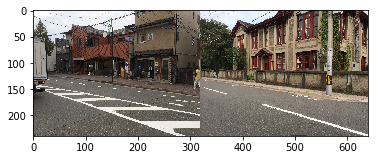

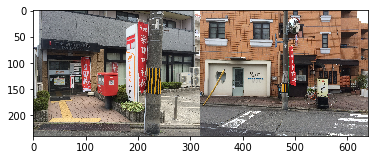

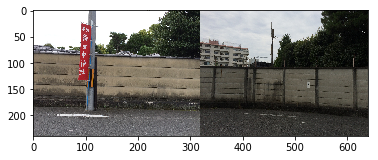

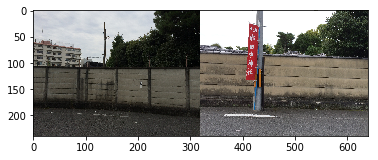

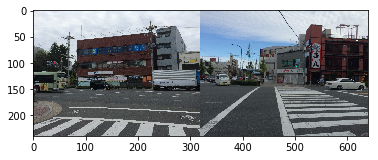

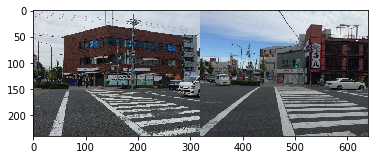

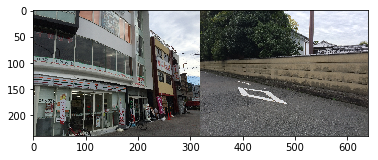

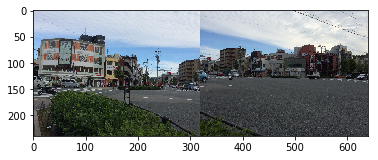

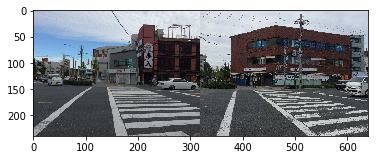

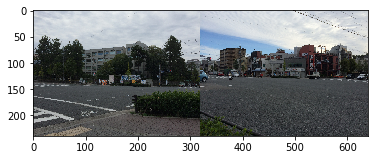

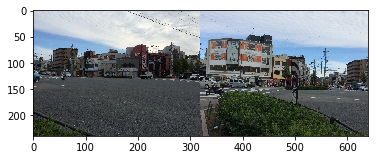

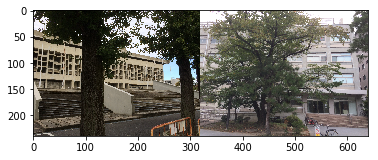

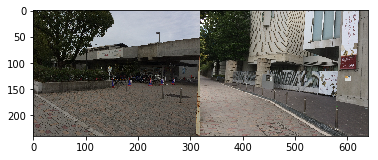

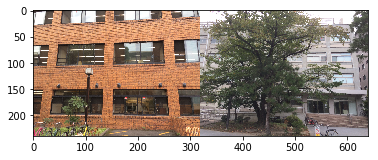

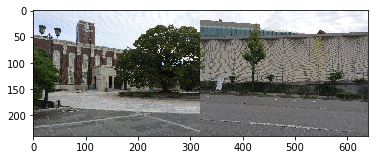

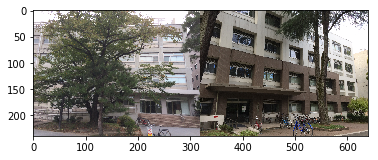

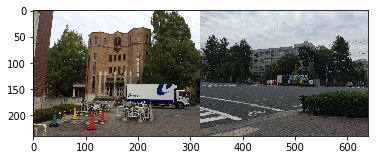

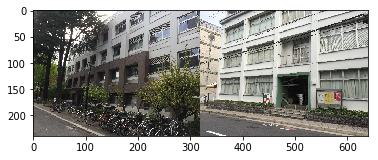

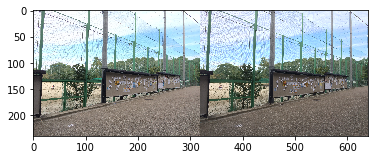

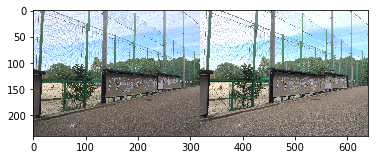

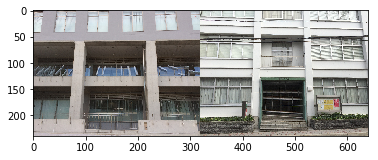

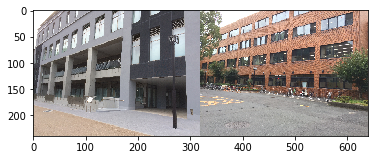

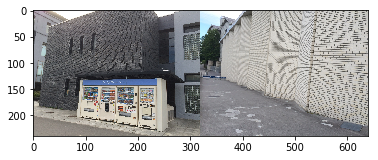

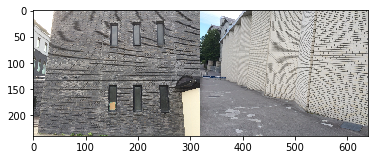

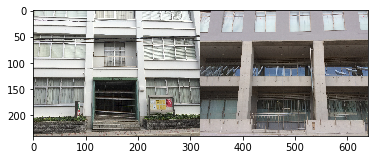

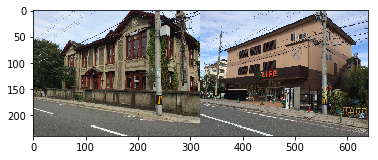

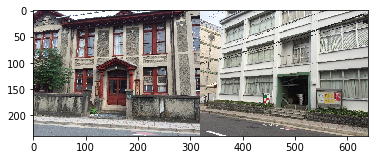

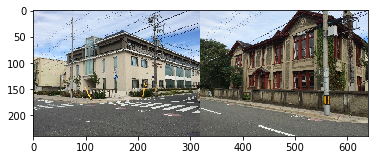

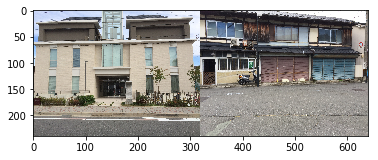

In [30]:
# show incorrect pairs
for i in range(0,ndata):
    myid = id[i]    
    other_id = id[np.argsort(d[i,:])[::-1][1]]
    if other_id != myid:
        im1 = Image.open('%s'%(fname[i]),'r')
        im1 = im1.resize((320,240))
        im2 = Image.open('%s'%(fname[np.argsort(d[i,:])[::-1][1]]),'r')
        im2 = im2.resize(im1.size)
        plt.imshow(np.hstack((np.array(im1),np.array(im2))))
        plt.show()

In [ ]:
#
# save pca data for dnn proessing
#

# data standlization
#data_for_cluster = np.reshape(data,(data.shape[0]*data.shape[1],data.shape[2]))

# standlization step
#me = np.mean(data_for_cluster,0)
#stv = np.std(data_for_cluster - me,0)
#stv2 = np.std(data_for_cluster,0)
#print(stv)
#print(stv2)
#data_standlized = (data_for_cluster - me) / stv
#data_whitened = data_standlized

# whiteneing step
#data_whitened = whiten(data_for_cluster)
#print(data_whitened)
#print(np.std(data_whitened,0))
#centers, distortion = kmeans(data_whitened,200)
#print(centers)
#print(distortion)
#print(data_whitened.shape)

#np.save("data_whitened.npy",data_whitened)
#np.save("data",data)
#np.save("centers.npy",centers)
#np.save("mean.npy",me)
#np.save("stv.npy",stv)